<a href="https://colab.research.google.com/github/Hasim-dev/MNIST-Digit-Recognition/blob/master/MNIST_(Keras).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.models import Model
import random

Using TensorFlow backend.


In [0]:
np.random.seed(0)

In [0]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

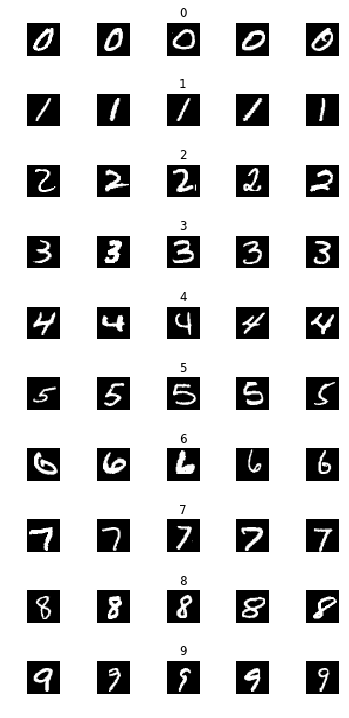

In [0]:
#Datayı grid hâlinde görüntüleme

num_of_samples=[]
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


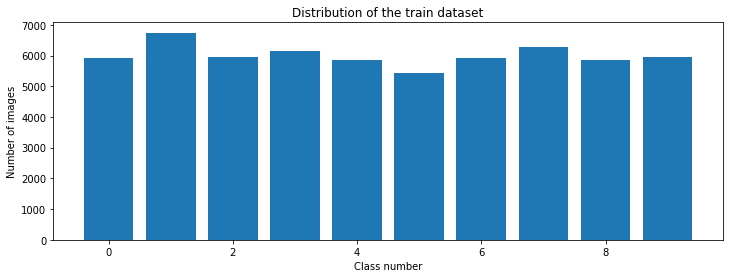

In [0]:
# Her sınıfta kaç adet veri olduğunu görmek için
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [0]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [0]:
# Labelları "one-hot encode" etme

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [0]:
#Görüntüyü normalize etme (0-255 arasında olan piksel değerlerinin 0-1 arasında olması için)
X_train = X_train/255
X_test = X_test/255

In [0]:
# define the LeNet model function
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten()) # FC layera girmesi için arrayin 1D olması gerekiyor.
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5)) # overfitting azaldı.
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [0]:
model = leNet_model()
print(model.summary())






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               188000   

In [0]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 9s 168us/step - loss: 0.2478 - acc: 0.9199 - val_loss: 0.0461 - val_acc: 0.9865
Epoch 2/10
54000/54000 [==============================] - 2s 38us/step - loss: 0.0685 - acc: 0.9783 - val_loss: 0.0360 - val_acc: 0.9893
Epoch 3/10
54000/54000 [==============================] - 2s 38us/step - loss: 0.0581 - acc: 0.9825 - val_loss: 0.0509 - val_acc: 0.9845
Epoch 4/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0536 - acc: 0.9834 - val_loss: 0.0310 - val_acc: 0.9910
Epoch 5/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0475 - acc: 0.9853 - val_loss: 0.0349 - val_acc: 0.9900
Epoch 6/10
54000/54000 [==============================] - 2s 36us/step - loss: 0.0412 - acc: 0.9874 - val_loss: 0.0414 - val_acc: 0.9893
Epoch 7/10
54000/54000 [==========

Text(0.5, 0, 'epoch')

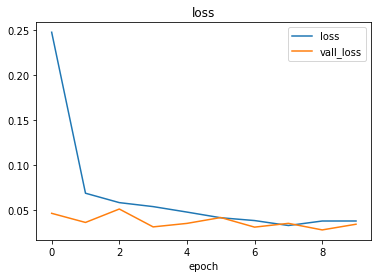

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'vall_loss'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

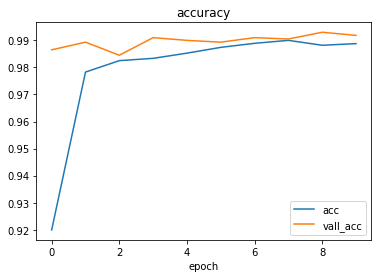

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'vall_acc'])
plt.title('accuracy')
plt.xlabel('epoch')

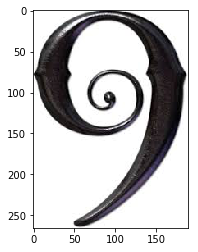

In [0]:
import requests
from PIL import Image

url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQXvahyYrMjoe9-5oBTp6z4RpRc0_gNBcGnvY1GYrKCb10ljbPh'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)

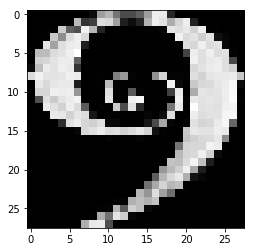

In [0]:
import cv2

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)co
plt.imshow(image, cmap=plt.get_cmap("gray"))

In [0]:
image = image/255
image = image.reshape(1, 28, 28, 1)

In [0]:
prediction = model.predict_classes(image)
print("Predicted digit:", str(prediction))

Predicted digit: [9]


Predicted digit: [9]


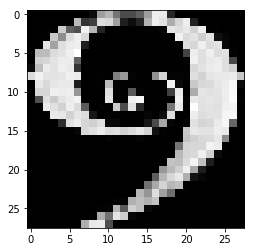

In [0]:
import requests
from PIL import Image
import cv2
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQXvahyYrMjoe9-5oBTp6z4RpRc0_gNBcGnvY1GYrKCb10ljbPh'

response = requests.get(url, stream=True)
img = Image.open(response.raw)

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap("gray"))

image = image/255
image = image.reshape(1, 28, 28, 1)

prediction = model.predict_classes(image)
print("Predicted digit:", str(prediction))

In [0]:
# Model, test setinde test edildi.
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score: ', score[0])

print('Test accuracy: ', score[1])

<class 'list'>
Test score:  0.03126243207690586
Test accuracy:  0.9911


In [0]:
#Conv. layerlardaki feature mapler görüntülendi. Böylece her mapin neyi öğrendiği görülebilir.

layer1 = Model(inputs=model.layers[0].input, output=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, output=model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(image), layer2.predict(image)
print(visual_layer1.shape)
print(visual_layer2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=Tensor("co...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=Tensor("co...)`
  This is separate from the ipykernel package so we can avoid doing imports until


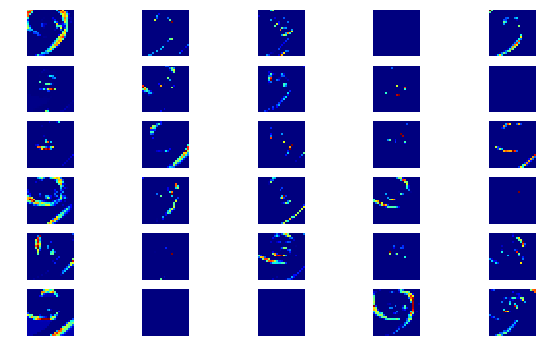

In [0]:
plt.figure(figsize=(10, 6))
for i in range(30):
  plt.subplot(6, 5, i+1)
  plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
  plt.axis('off')

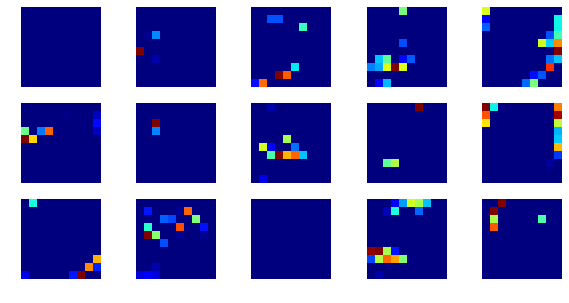

In [0]:
plt.figure(figsize=(10, 5))
for i in range(15):
  plt.subplot(3, 5, i+1)
  plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
  plt.axis('off')